In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/ajiteshshree/BCS-Comp-Neuro/main/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/ajiteshshree/BCS-Comp-Neuro/main/test.csv")

In [3]:
y = df_train["SalePrice"]

In [4]:
df_train = df_train.drop("SalePrice", axis='columns')

In [5]:
df_train.set_index("Id", inplace=True)
df_test.set_index("Id",inplace=True)

In [6]:
assert list(df_train.columns) == list(df_test.columns), "Dimension Mismatch"

## Removing null values

In [7]:
df = pd.concat([df_train,df_test])

In [8]:
cols = df.shape[1]
rows = df.shape[0]

In [9]:
arr_original = np.array(df.columns)

In [10]:
# finding no.of null values in columns having null values
i=0
to_delete = []
to_keep_null = []
while i < cols:
    cnt = df.iloc[:,i].isnull().sum()    
    if cnt != 0:
        if cnt >= rows/2.1:
            to_delete.append(arr_original[i])
        else:
            to_keep_null.append(arr_original[i])
            
        print(arr_original[i],end=' - ')
        print(df.iloc[:,i].dtype,end = " : ")
        print(df.iloc[:,i].isnull().sum())
    i +=1

MSZoning - object : 4
LotFrontage - float64 : 486
Alley - object : 2721
Utilities - object : 2
Exterior1st - object : 1
Exterior2nd - object : 1
MasVnrType - object : 24
MasVnrArea - float64 : 23
BsmtQual - object : 81
BsmtCond - object : 82
BsmtExposure - object : 82
BsmtFinType1 - object : 79
BsmtFinSF1 - float64 : 1
BsmtFinType2 - object : 80
BsmtFinSF2 - float64 : 1
BsmtUnfSF - float64 : 1
TotalBsmtSF - float64 : 1
Electrical - object : 1
BsmtFullBath - float64 : 2
BsmtHalfBath - float64 : 2
KitchenQual - object : 1
Functional - object : 2
FireplaceQu - object : 1420
GarageType - object : 157
GarageYrBlt - float64 : 159
GarageFinish - object : 159
GarageCars - float64 : 1
GarageArea - float64 : 1
GarageQual - object : 159
GarageCond - object : 159
PoolQC - object : 2909
Fence - object : 2348
MiscFeature - object : 2814
SaleType - object : 1


In [11]:
# Remove redundant columns with a lot of nulls
df_modified = df.drop(to_delete,axis='columns')

In [12]:
df_modified.shape

(2919, 74)

In [13]:
df_modified.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [14]:
#all null values filled with either mode(when dtype is object) or mean (when dtype is float)
j=0
arr_modified = np.array(to_keep_null)
while j <len(arr_modified):
    if df_modified[arr_modified[j]].dtype == 'float64':
        df_modified[arr_modified[j]] = df_modified[arr_modified[j]].fillna(df_modified[arr_modified[j]].mean())
    if df_modified[arr_modified[j]].dtype == 'O':
        df_modified[arr_modified[j]] = df_modified[arr_modified[j]].fillna(df_modified[arr_modified[j]].mode()[0])
    j +=1

In [15]:
df_modified.shape

(2919, 74)

In [16]:
df_modified.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,Mod,...,48,0,0,0,0,0,11,2006,WD,Normal


## <u>Encoding:</u>

In [17]:
le = LabelEncoder()
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [18]:
arr_col= np.array(df_modified.columns)

In [19]:
j=0
while j < 74:
    if df[arr_col[j]].dtype == 'O':
        print(arr_col[j], end = ' : ')
        print(df_modified[arr_col[j]].unique())
    j +=1

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st : ['VinylSd' 'Meta

In [20]:
dfle = df_modified.copy()

In [21]:
dfle.shape

(2919, 74)

In [22]:
# label encode
j=0
while j < 74:
    if df[arr_col[j]].dtype == 'O':
        dfle[arr_col[j]] = le.fit_transform(dfle[arr_col[j]])
    j +=1

In [23]:
dfle.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
2,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
3,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
4,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
5,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4


In [24]:
# Onehot encode
l=0
while l < 74:
    if df[arr_col[l]].dtype == 'O':
        ct = ColumnTransformer([(arr_col[l], OneHotEncoder(), [0])], remainder = 'passthrough')
        dfle = ct.fit_transform(dfle)
    l += 1

In [25]:
X_train = dfle[0:1460,:]
X_test = dfle[1460:,:]

In [26]:
X_train.shape

(1460, 126)

In [27]:
y.shape

(1460,)

In [28]:
X_test.shape

(1459, 126)

## Linear Regression:

In [29]:
model1 = LinearRegression()
model1.fit(X_train,y)

LinearRegression()

In [38]:
#predictions
np.array(model1.predict(X_test))

array([108893.15673828, 146168.46923828, 164185.32080078, ...,
       143787.93212891, 110714.79736328, 246225.57080078])

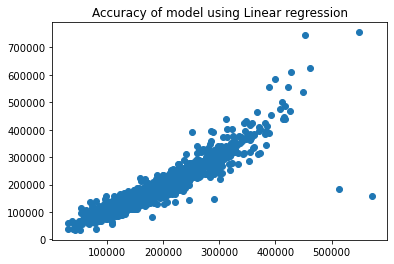

In [31]:
plt.title("Accuracy of model using Linear regression")
plt.scatter(model1.predict(X_train),y)
plt.show()

In [32]:
r2_score(y, model1.predict(X_train))

0.8515446721047558

## K Nearest Neighbours:

In [33]:
a=1
li = [0]
while a <101:
    model2 = KNeighborsRegressor(n_neighbors=a)
    model2.fit(X_train,y)
    li.append(r2_score(y,model2.predict(X_train)))
    a +=1

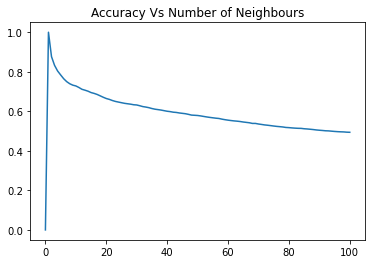

In [34]:
plt.title("Accuracy Vs Number of Neighbours")
plt.plot(li)